<a href="https://colab.research.google.com/github/fmarcelneves/Rental-price-analysis-and-forecast-Curitiba-PR/blob/main/Data_exploration_Curitiba_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages 

In [ ]:
%%capture
!pip install geopandas
!pip install outlier-removal-101703289
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from outlier_removal.outlier import remove_outlier

In [ ]:
%%capture
!pip install plotly --upgrade
from plotly import __version__
print (__version__)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly as py
#import plotly.figure_factory as ff
from plotly import tools
#import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# Import data 

In [ ]:
url = 'https://raw.githubusercontent.com/fmarcelneves/Rental-price-analysis-and-forecast-Curitiba-PR/main/data_mercado_livre_ap_curitiba_rent.csv'
da_ml = pd.read_csv(url)
#da_ml = pd.read_csv('dados_mercado_livre_curitiba.csv')

# Filtering data 

In [ ]:
da_ml = remove_outlier(da_ml)

/usr/local/lib/python3.6/dist-packages/outlier_removal/outlier.py:24: RuntimeWarning: invalid value encountered in greater
  return np.where((col > upper_bound) | (col < lower_bound))
/usr/local/lib/python3.6/dist-packages/outlier_removal/outlier.py:24: RuntimeWarning: invalid value encountered in less
  return np.where((col > upper_bound) | (col < lower_bound))


In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
da_ml.replace(',','.', regex=True,inplace=True)
da_ml['areas'] = da_ml['areas'].astype(float)

# Data exploration

In [ ]:
da_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,811.00,1303.43,615.21,2.00,850.00,1170.00,1600.00,3250.00
quartos,789.00,1.89,0.84,1.00,1.00,2.00,3.00,5.00
areas,802.00,64.75,49.11,17.00,37.00,53.00,74.00,801.00


In [ ]:
#filtro_precos = da_ml['precos'] < 800

In [ ]:
da_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 915
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bairro   802 non-null    object 
 1   precos   811 non-null    float64
 2   quartos  789 non-null    float64
 3   areas    802 non-null    float64
dtypes: float64(3), object(1)
memory usage: 31.7+ KB


In [ ]:
da_ml.isnull().sum()

bairro      9
precos      0
quartos    22
areas       9
dtype: int64

In [ ]:
da_ml['bairro'].value_counts()

Reboucas             46
Centro               44
Cidade-Industrial    41
Bigorrilho           39
Cristo-Rei           39
                     ..
Campo-de-Santana      1
Bom-Retiro            1
Champagnat            1
Cachoeira             1
Parolin               1
Name: bairro, Length: 62, dtype: int64

In [ ]:
da_ml.groupby(['bairro']).median().sort_values('precos', ascending=False)

,precos,quartos,areas
bairro,,,
Champagnat,2800.00,3.00,193.00
Bigorrilho,2300.00,2.00,67.00
Capao-da-Imbuia,2137.50,3.50,157.00
Jardim-das-Americas,1950.00,1.50,86.00
Batel,1945.00,2.00,89.50
...,...,...,...
Cachoeira,750.00,2.00,45.00
Sao-Lourenco,725.00,1.50,50.00
Tatuquara,675.00,2.00,47.00


In [ ]:
da_group = da_ml.groupby(['bairro']).median().sort_values('precos', ascending=False)

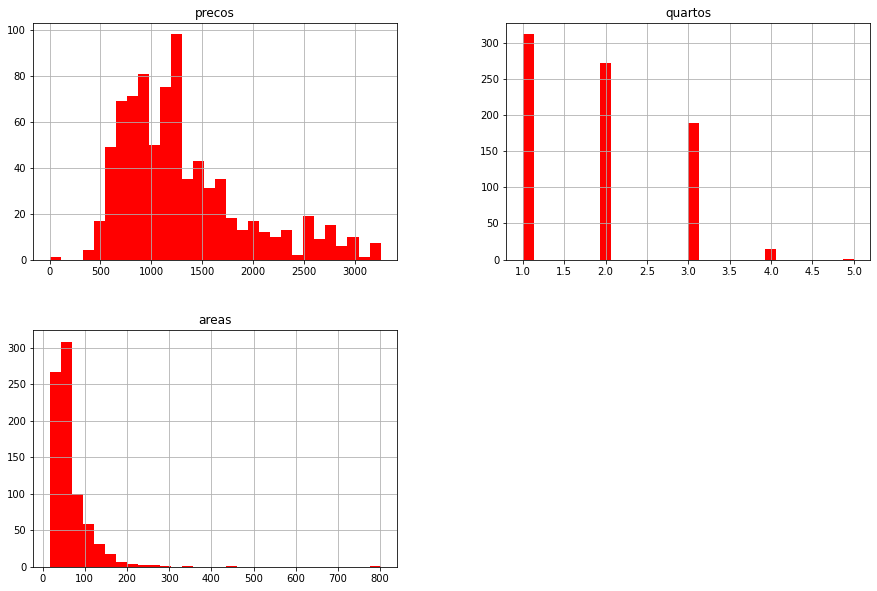

In [ ]:
da_ml.hist(bins=30, figsize=(15, 10), color = 'r');

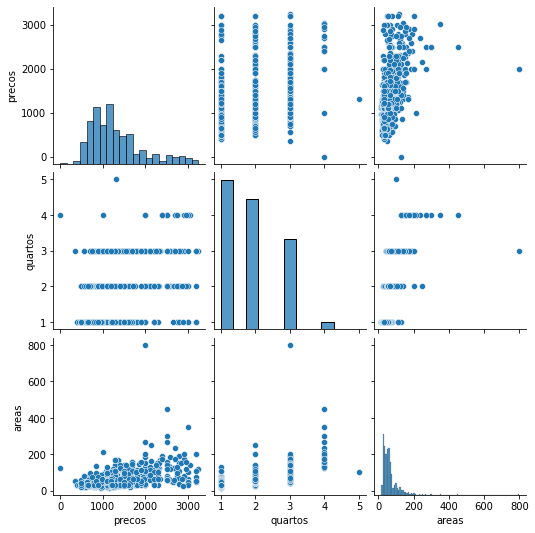

In [ ]:
 sns.pairplot(da_ml)

In [ ]:
sns.pairplot

<function seaborn.axisgrid.pairplot>

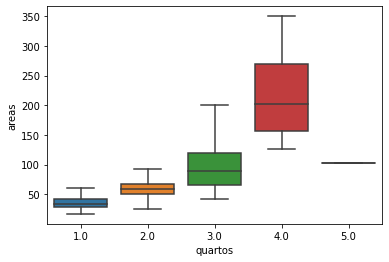

In [ ]:
sns.boxplot(x="quartos", y="areas", data=da_ml, showfliers = False);

Text(0.5, 1.0, 'Correlation')

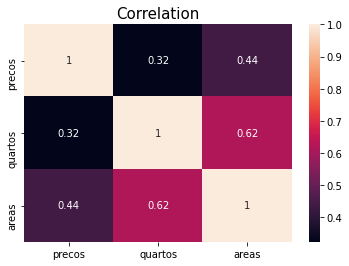

In [ ]:
corrMatrix = sns.heatmap(da_ml.corr(), annot=True);
corrMatrix.set_title('Correlation', fontsize=15)

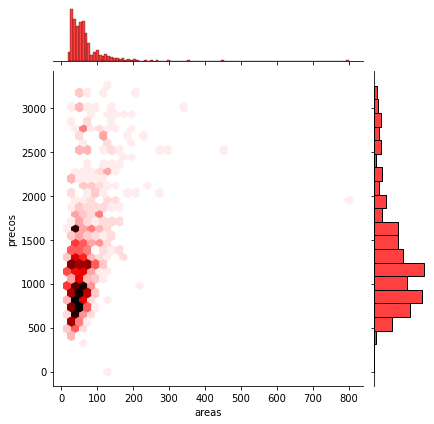

In [ ]:
sns.jointplot(x="areas", y="precos", data=da_ml, kind="hex", color="r");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


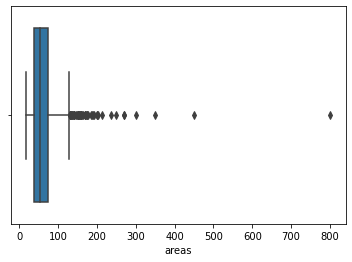

In [ ]:
sns.boxplot(da_ml['areas']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


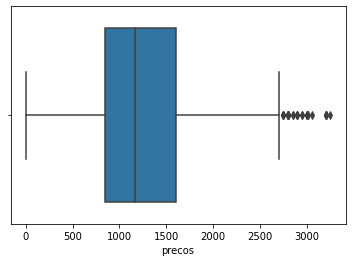

In [ ]:
sns.boxplot(da_ml['precos']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


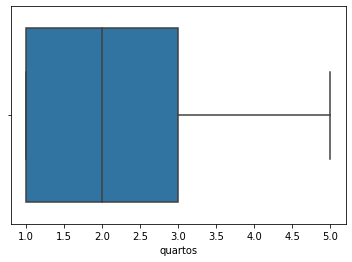

In [ ]:
sns.boxplot(da_ml['quartos']);

In [ ]:
da_ml

,bairro,precos,quartos,areas
0,Abranches,2500.00,2.00,80.00
1,Abranches,2100.00,2.00,65.00
2,Abranches,2500.00,2.00,80.00
3,Abranches,2100.00,2.00,65.00
4,Abranches,600.00,1.00,35.00
...,...,...,...,...
911,Agua-Verde,1500.00,1.00,46.00
912,Agua-Verde,1200.00,1.00,29.00
913,Agua-Verde,1230.00,1.00,31.00
914,Agua-Verde,1500.00,1.00,30.00


In [ ]:
#da_ml.to_csv('data_rent_ap_curitiba_mercado_livre.csv')

In [ ]:
da_group.head()

,precos,quartos,areas
bairro,,,
Champagnat,2800.00,3.00,193.00
Bigorrilho,2300.00,2.00,67.00
Capao-da-Imbuia,2137.50,3.50,157.00
Jardim-das-Americas,1950.00,1.50,86.00
Batel,1945.00,2.00,89.50


In [ ]:
da_price = da_group.drop('quartos', 1).drop('areas', 1).reset_index()

In [ ]:
da_price['bairro'] = da_price['bairro'].str.capitalize()

In [54]:
da_price.head()

,bairro,precos
0,Champagnat,2800.00
1,Bigorrilho,2300.00
2,Capao,2137.50
3,Jardim das americas,1950.00
4,Batel,1945.00


In [ ]:
db = gpd.read_file('DIVISA_DE_BAIRROS.shp')

In [ ]:
db.head()

,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry
0,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7..."
1,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7..."
2,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7..."
3,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7..."
4,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7..."


In [ ]:
db['bairro'] = db['NOME'].str.capitalize()

In [ ]:
db['bairro'] = db['bairro'].replace('Cidade industrial de curitiba', 'Cidade industrial')

In [ ]:
merged = db.set_index('bairro').join(da_price.set_index('bairro'))
merged = merged.reset_index()
#merged = merged.fillna(0)

In [ ]:
merged['precos'] = merged['precos'].fillna(merged.groupby('NM_REGIONA')['precos'].transform('median'))

In [ ]:
merged.head()

,bairro,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,precos
0,Água verde,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",1090.00
1,Jardim social,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",1200.00
2,Xaxim,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",970.00
3,Jardim das américas,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",957.50
4,Guaíra,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",1090.00


In [ ]:
 merged.groupby(['bairro']).median().sort_values('precos', ascending=True)

,OBJECTID,CODIGO,CD_REGIONA,SHAPE_AREA,SHAPE_LEN,precos
bairro,,,,,,
Cachoeira,60,51.00,4.00,3221611.22,8921.57,660.00
Campo de santana,52,71.00,12.00,21579444.88,26635.14,700.00
Tatuquara,49,74.00,12.00,11234800.38,21895.61,700.00
Caximba,46,70.00,12.00,8215223.22,16903.13,700.00
Fazendinha,30,42.00,7.00,3723681.44,8791.17,790.00
...,...,...,...,...,...,...
Bigorrilho,66,11.00,1.00,2896537.37,7938.14,1850.00
Hugo lange,2,17.00,1.00,1184234.49,4676.69,1950.00
Batel,39,10.00,1.00,1737732.42,5622.22,1990.00


In [ ]:
 merged.groupby(['NM_REGIONA']).median().sort_values('precos', ascending=False)

,OBJECTID,CODIGO,CD_REGIONA,SHAPE_AREA,SHAPE_LEN,precos
NM_REGIONA,,,,,,
REGIONAL MATRIZ,23.50,10.50,1.00,1876561.14,6225.21,1350.00
REGIONAL SANTA FELICIDADE,69.00,48.00,5.00,3512540.74,10446.54,1295.00
REGIONAL PORTÃO,10.50,27.50,7.00,2284859.19,6949.10,1090.00
REGIONAL CIC,44.50,68.50,11.00,8355042.00,18813.55,1020.00
REGIONAL BOA VISTA,48.50,49.50,4.00,4237817.97,11098.51,1011.50
REGIONAL SANTA FELICIDADE / REGIONAL PORTÃO,33.00,44.00,5.00,8569837.61,16637.62,1000.00
REGIONAL CAJURU,30.00,21.50,3.00,4014396.44,9308.81,957.50
REGIONAL BOQUEIRÃO,34.00,56.50,2.00,10536322.74,16155.39,910.00
REGIONAL PINHEIRINHO,28.00,41.00,8.00,5049840.13,11816.64,900.00


In [ ]:
merged.head()

,bairro,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,precos
0,Água verde,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",1090.00
1,Jardim social,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",1200.00
2,Xaxim,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",970.00
3,Jardim das américas,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",957.50
4,Guaíra,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",1090.00


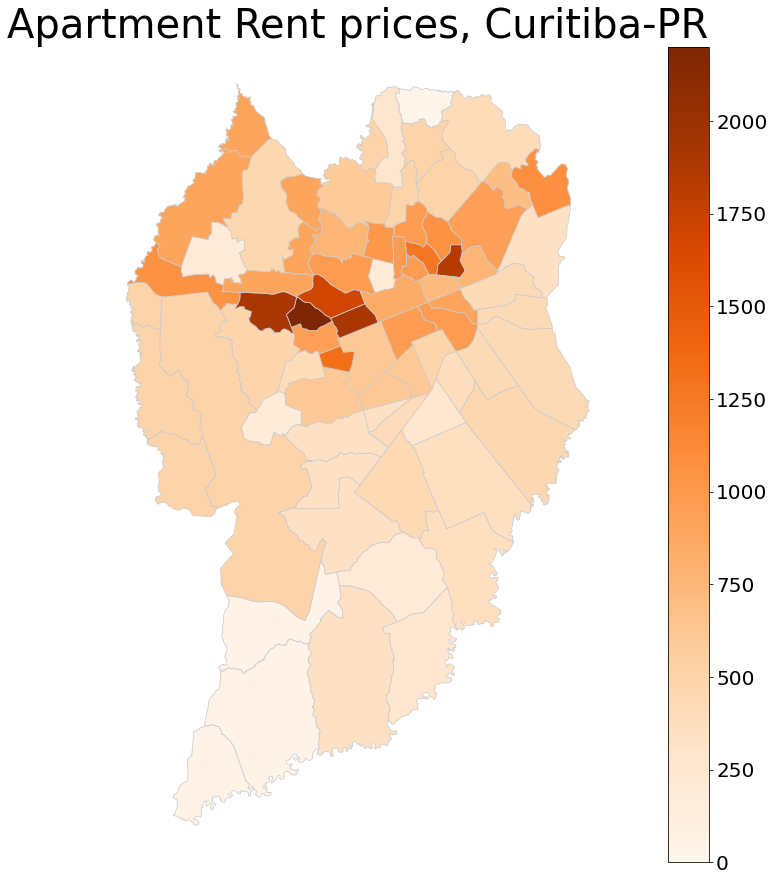

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 15))
ax.axis('off')
ax.set_title('Apartment Rent prices, Curitiba-PR', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 2200
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('precos', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))